# Conceptual

__1.__ Using basic statistical properties of the variance, as well as single variable calculus, derive (5.6). In other words, prove that $\alpha$ given by (5.6) does indeed minimize $\mathrm{Var}(\alpha X + (1 - \alpha)Y)$.

\begin{align}\tag{5.6}
\alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2 \sigma_{XY}}
\end{align}

where $\sigma_X^2 = \mathrm{Var}(X)$, $\sigma_Y^2 = \mathrm{Var}(Y)$, and $\sigma_{XY} = \mathrm{Cov}(X,Y)$.

\begin{align}
\mathrm{Var}(\alpha X + (1 - \alpha) Y) = \alpha^2\sigma_X^2 + (1 - \alpha)^2\sigma_Y^2 + 2\alpha(1 - \alpha)\sigma_{XY}
\end{align}

We now take the fist derivative of $\mathrm{Var}(\alpha X + (1 - \alpha) Y)$ relative to $\alpha$ and we get
\begin{align}
\frac{\partial}{\partial\alpha}\mathrm{Var}(\alpha X + (1 - \alpha) Y) = 2\alpha\sigma_X^2 - 2\sigma_Y^2 + 2\alpha\sigma_Y^2 + 2\sigma_{XY} - 4\alpha\sigma_{XY}
\end{align}

We now seek critical points by equalling the last expression to $0$,
\begin{align}
2\alpha\sigma_X^2 - 2\sigma_Y^2 + 2\alpha\sigma_Y^2 + 2\sigma_{XY} - 4\alpha\sigma_{XY} = 0
\end{align}

which implies that
\begin{align}
\alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}
\end{align}

---

__2.__ We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a boostrap sample from a set of $n$ observations.

(a) What is the probability that the first bootstrap observation is _not_ the _j_ th observation from the original sample? Justify your answer.  
__SOLUTION__  
\begin{align}
1 - 1/n
\end{align}

(b) What is the probability that the second bootstrap observation is _not_ the _j_ th observation from the original sample?  
__SOLUTION__  
\begin{align}
1 - 1/n
\end{align}

(c) Argue that the probability that the _j_ th observation is _not_ in the bootstrap sample is $(1-1/n)^n$.  
__SOLUTION__  
Since each observation is independent, the product that the _j_ th observation is not in the bootstrap sample is
\begin{align}
(1-1/n)\cdots(1-1/n)=(1-1/n)^2
\end{align}

(d) When $n=5$, what is the probability that the _j_ th observation is in the bootstrap sample?  
__SOLUTION__  
\begin{align}
\mathrm{P}(\mathrm{jth observation in bootstrap sample})=1-(1-1/5)^5=0.672\mathrm{.}
\end{align}

(e) When $n=100$, what is the probability that the _j_ th observation is in the bootstrap sample?  
__SOLUTION__

In [1]:
1 - (1-1/100)^100

[1] 0.6339677

(f) When $n=10,000$, what is the probability that the _j_ th observation is in the bootstrap sample?

In [2]:
1 - (1-1/10000)^10000

[1] 0.632139

(g) Create a plot that displays, for each integer value of $n$ from 1 to 10,000, the probability that the _j_ th observation is in the bootstrap sample. Comment on what you observe.

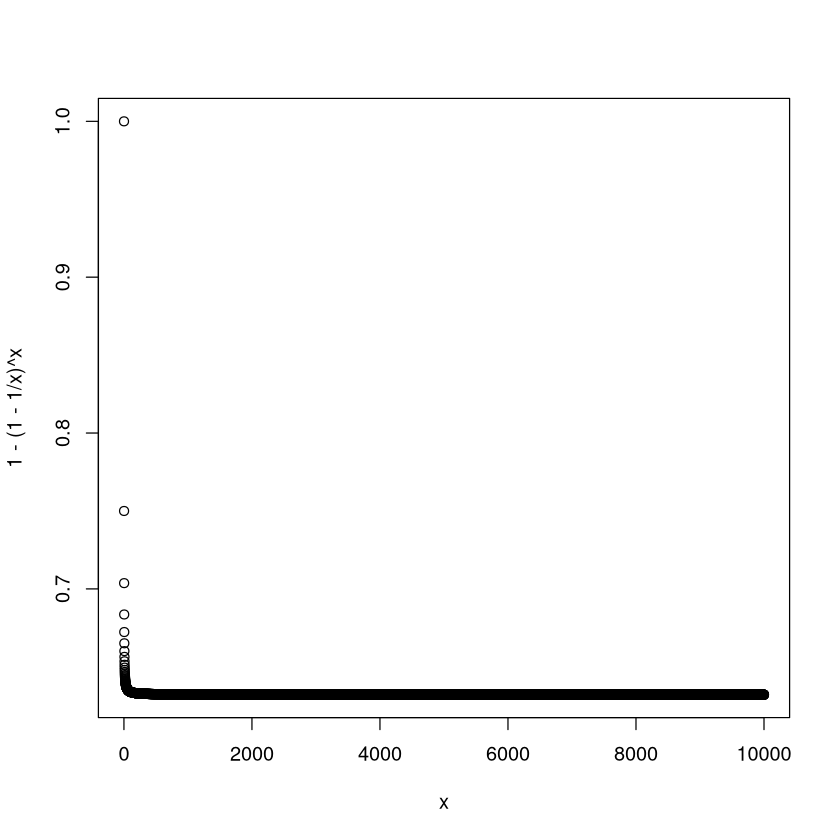

In [3]:
x <- 1:10000
plot(x, 1 - (1-1/x)^x)

The values converge very quickly to a value.

(h) We will now investigate numerically the probability that a bootstrap sample of size $n=100$ contains the _j_ th observation. Here $j=4$. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.

In [4]:
store <- rep(NA, 10000)
for(i in 1:10000){
    store[i] <- sum(sample(1:100, rep=TRUE) == 4) > 0
}
mean(store)

[1] 0.6246

Comment on the results obtained.

__SOLUTUION__  
From calculus
\begin{align}
\lim_{n \to \infty}(1 + x/n)^x = e^x
\end{align}
If we apply this to our situation then
\begin{align}
1 - 1/e = 0.632 \text{ as } n \to \infty
\end{align}

---

__3.__ We now review _k_-fold cross-validation.  

(a) Explain how _k_-fold cross-validation is implemented.  
__SOLUTUION__  
_k_-fold cross-validation is implemented by taking the $n$ observations and randomly splitting it into $k$ non-overlapping groups of length of (approximately) $n/k$. These groups acts as a validation set, and the remainder (of length $n-n/k$) acts as a training set. The test error is then estimated by averaging the $k$ resulting MSE estimates.

(b) What are the advantages and disadvantages of _k_-fold cross-validation relative to:  

i. The validation set approach?  
__SOLUTION__  
The validation set approach has two main drawbacks when compared to the _k_-fold cross-validation method. First, the validation estimate of the test error rate can be highly variable (depending on precisely which observations are included in the training set and which observations are included in the validation set). Second, only a subset of the observations are used to fit the model. Since statistical methods tend to perform worse when trained on fewer observations, this suggests that the validation set error rate may tend to overestimate the test error rate for the model fit on the entire data set.

ii. LOOCV?  
__SOLUTION__  
The LOOCV cross-validation is a special case of _k_-fold cross validation in which $k=n$. This approach has two drawbacks compared to _k_-fold cross-validation. First, it requires fitting the potentially computationally expensive model $n$ times compared to _k_-fold cross-validation which requires the model to be fitted only $k$ times. Second, the LOOCV cross-validation approach may give approximately unbiased estimates of the test error, since each training set contains $n-1$ observations; however, this approach has higher variance than _k_-fold cross-validation (since we are averaging the outputs of $n$ fitted models trained on an almost identical set of observations, these outputs are highly correlated, and the mean of highly correlated quantities has higher variance than less correlated ones). So, there is a bias-variance trade-off associated with the choice of $k$ in _k_-fold cross-validation; typically using $k=5$ or $k=10$ yield test error rate estimates that suffer neither from excessively high bias nor from very high variance.

---

__4.__ Suppose that we use some statistical learning method to make a prediction for the response $Y$ for a particular value of the predictor $X$. Carefully describe how we migh estimate the standard deviation of our prediction.

We may estimate the standard deviation of our prediction by using the bootstrap method. In this case, rather than obtaining new independent data sets from the population and fitting our model on those data sets, we instead obtain repeated random samples from the original data set. In this case, we perform sampling with replacement $B$ times and then find the corresponding estimates and the standard deviatio of those $B$ estimates by using equation (5.8)
\begin{align}
\text{SE}_{B}(\hat{\alpha}) = \sqrt{\frac{1}{B-1} \sum_{r=1}^B{\left( \hat{\alpha}^{*r} - \frac{1}{B} \right)^2} }\text{.}\tag{5.8}
\end{align}